In [36]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from matplotlib.cm import get_cmap
from create_in import create_in
from out_reader import out_reader

In [37]:
N = 200

S_namics = 50

alpha = 0.4

Cs = pow(10, -2) * 1.66


chi_range = [2, 2.2, 2.4, 2.6, 2.8, 3]

# [1, 1.2, 1.3, 1.45, 1.7, 2]
# [2, 2.2, 2.4, 2.6, 2.8, 3]
# [2.1, 2.3, 2.5, 2.7, 2.9, 3.1]

chi_surf = 0.5
chi_ions = 0.5

In [38]:
phi_brush_prof, psi_brush_prof, ends_brush_prof = {}, {}, {}
for chi in chi_range:
    file_name_pro = create_in(
            template_surf_charge='/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/scf_templates/flat_brush_chi.in',
            range_param='Cs',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_ions = chi_ions,
            chi_surf = chi_surf,
            N_layers = N - 80,
            N=N,
            S=S_namics,
            alpha=alpha,
            Kuhn = '1e-09',
        )

    # Парсим профили
    psi, phi_brush, phi_end_brush = out_reader(alpha = alpha,file_names=file_name_pro)
    phi_brush_prof[chi] = (phi_brush)
    psi_brush_prof[chi] = (psi)
    ends_brush_prof[chi] = (phi_end_brush)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.749799e+00 |g| = 3.855859e+00 alpha = 1.000000e+00 
hessian scaling: 0.0552434
it =  1  E = 1.663138e+00 |g| = 3.831723e+00 alpha = 1.259346e-01 
it =  2  E = 1.597065e+01 |g| = 3.762073e+00 alpha = 1.278373e-03 
it =  3  E = 9.985357e+00 |g| = 3.730007e+00 alpha = 3.095225e-03 
it =  4  E = 1.049632e+01 |g| = 3.683121e+00 alpha = 2.683228e-03 
it =  5  E = 9.325999e+00 |g| = 3.750898e+00 alpha = 3.397586e-03 
it =  6  E = 9.596433e+00 |g| = 3.707457e+00 alpha = 3.026342e-03 
it =  7  E = 7.202583e+00 |g| = 3.566051e+00 alpha = 4.972364e-03 
it =  8  E = 7.446160e+00 |g| = 3.463516e+00 alpha = 4.410771e-03 
it =  9  E = 7.732256e+00 |g| = 3.516502e+00 alpha = 4.112152e-03 
it =  10  E = 7.248023e+00 |g| = 3.571998e+

/tmp/ipykernel_2733621/3673022988.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


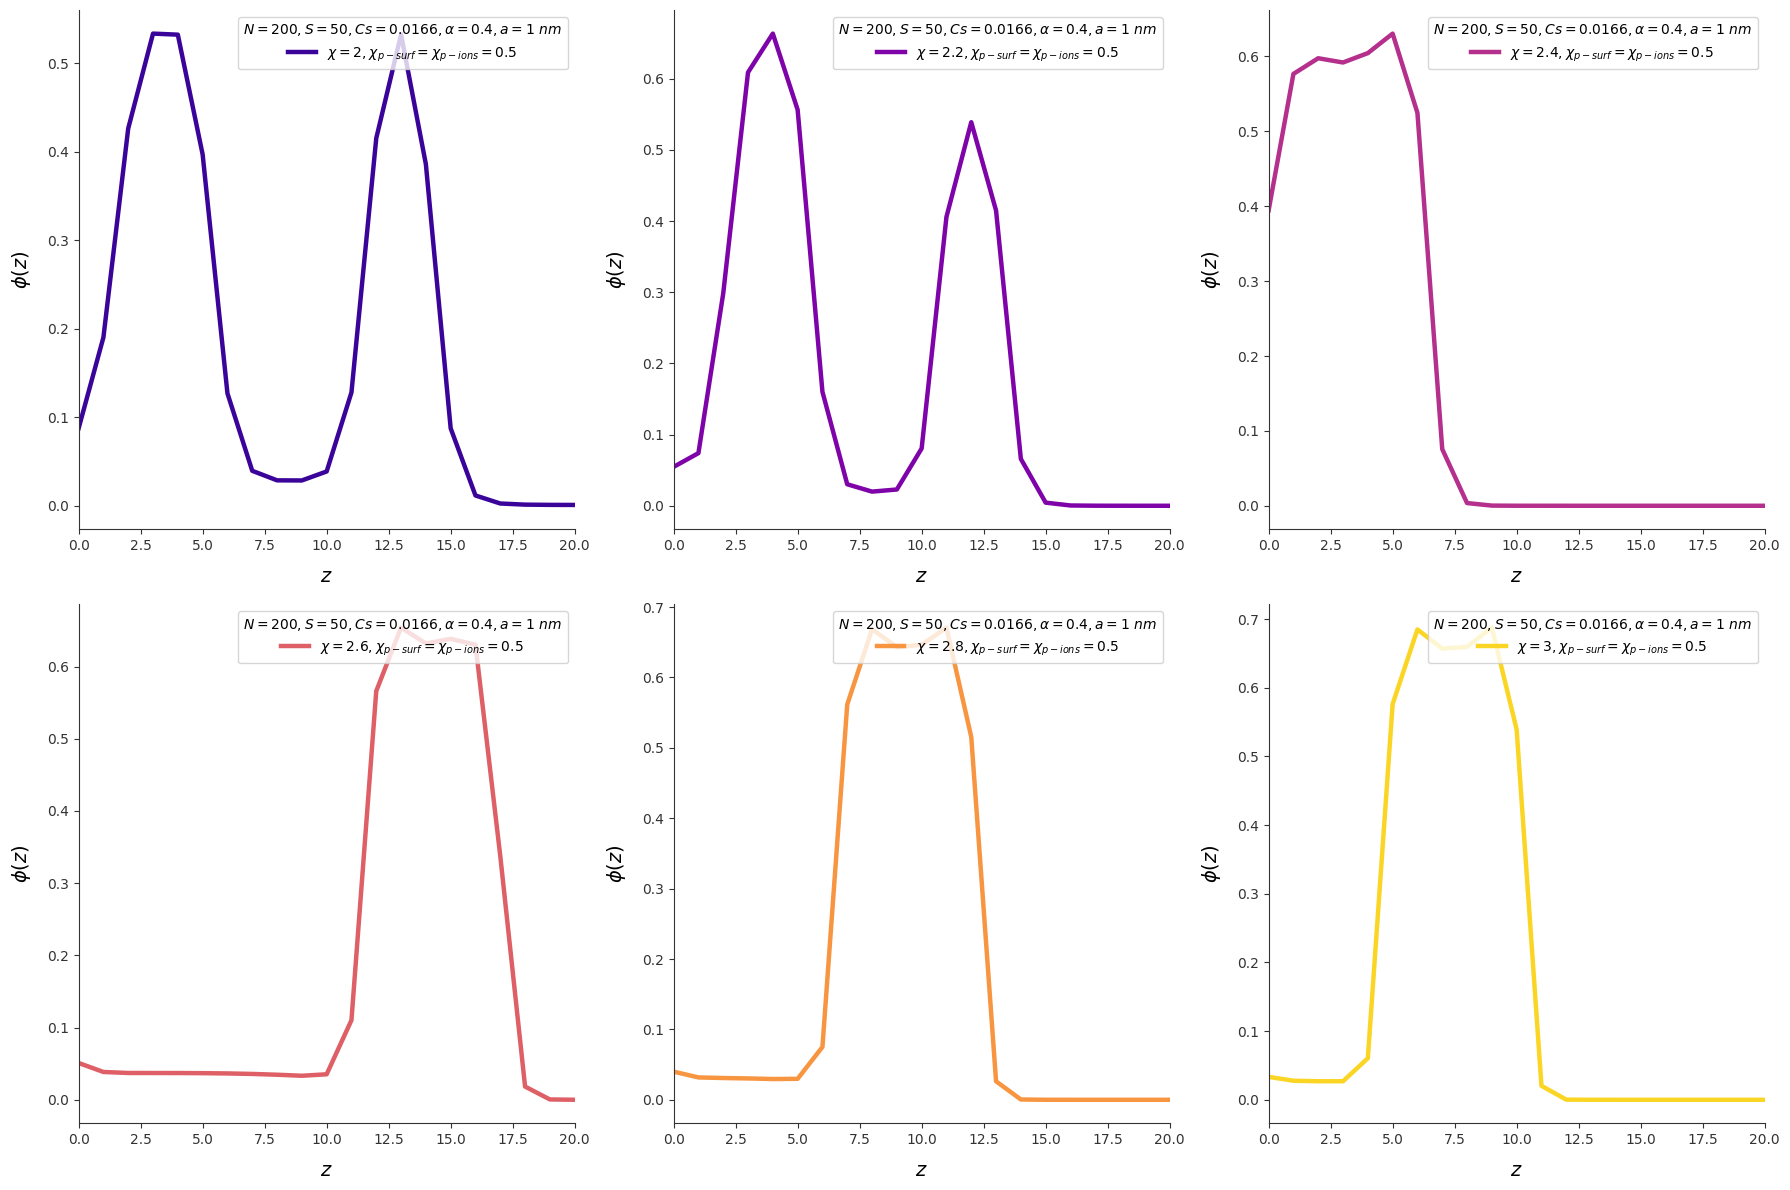

In [42]:
color_map = get_cmap("plasma")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Создаем сетку из 6 графиков (2 строки, 3 столбца)
axes = axes.flatten()  # Преобразуем массив осей в плоский список

for i, (chi, (phi_brush)) in enumerate(phi_brush_prof.items()):

    base_color = color_map((i + 0.5) / len(chi_range))
    ax = axes[i]  # Выбираем текущую ось
    
    ax.plot(phi_brush, label=f'$\\chi = {chi}, \\chi_{{p-surf}} = \\chi_{{p-ions}} = 0.5$', linewidth=3.2, color=base_color, linestyle="-")

    # Настройка визуализации для текущего окна
    ax.set_xlabel("$z$", fontsize=14, labelpad=10)
    ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
    ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
              title_fontsize=10, loc="upper right")

    # Добавляем фон и рамку для текущего окна
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
    
    ax.set_xlim(0, 20)

plt.tight_layout()
# plt.savefig('figure_3.pdf', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_2733621/695359432.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


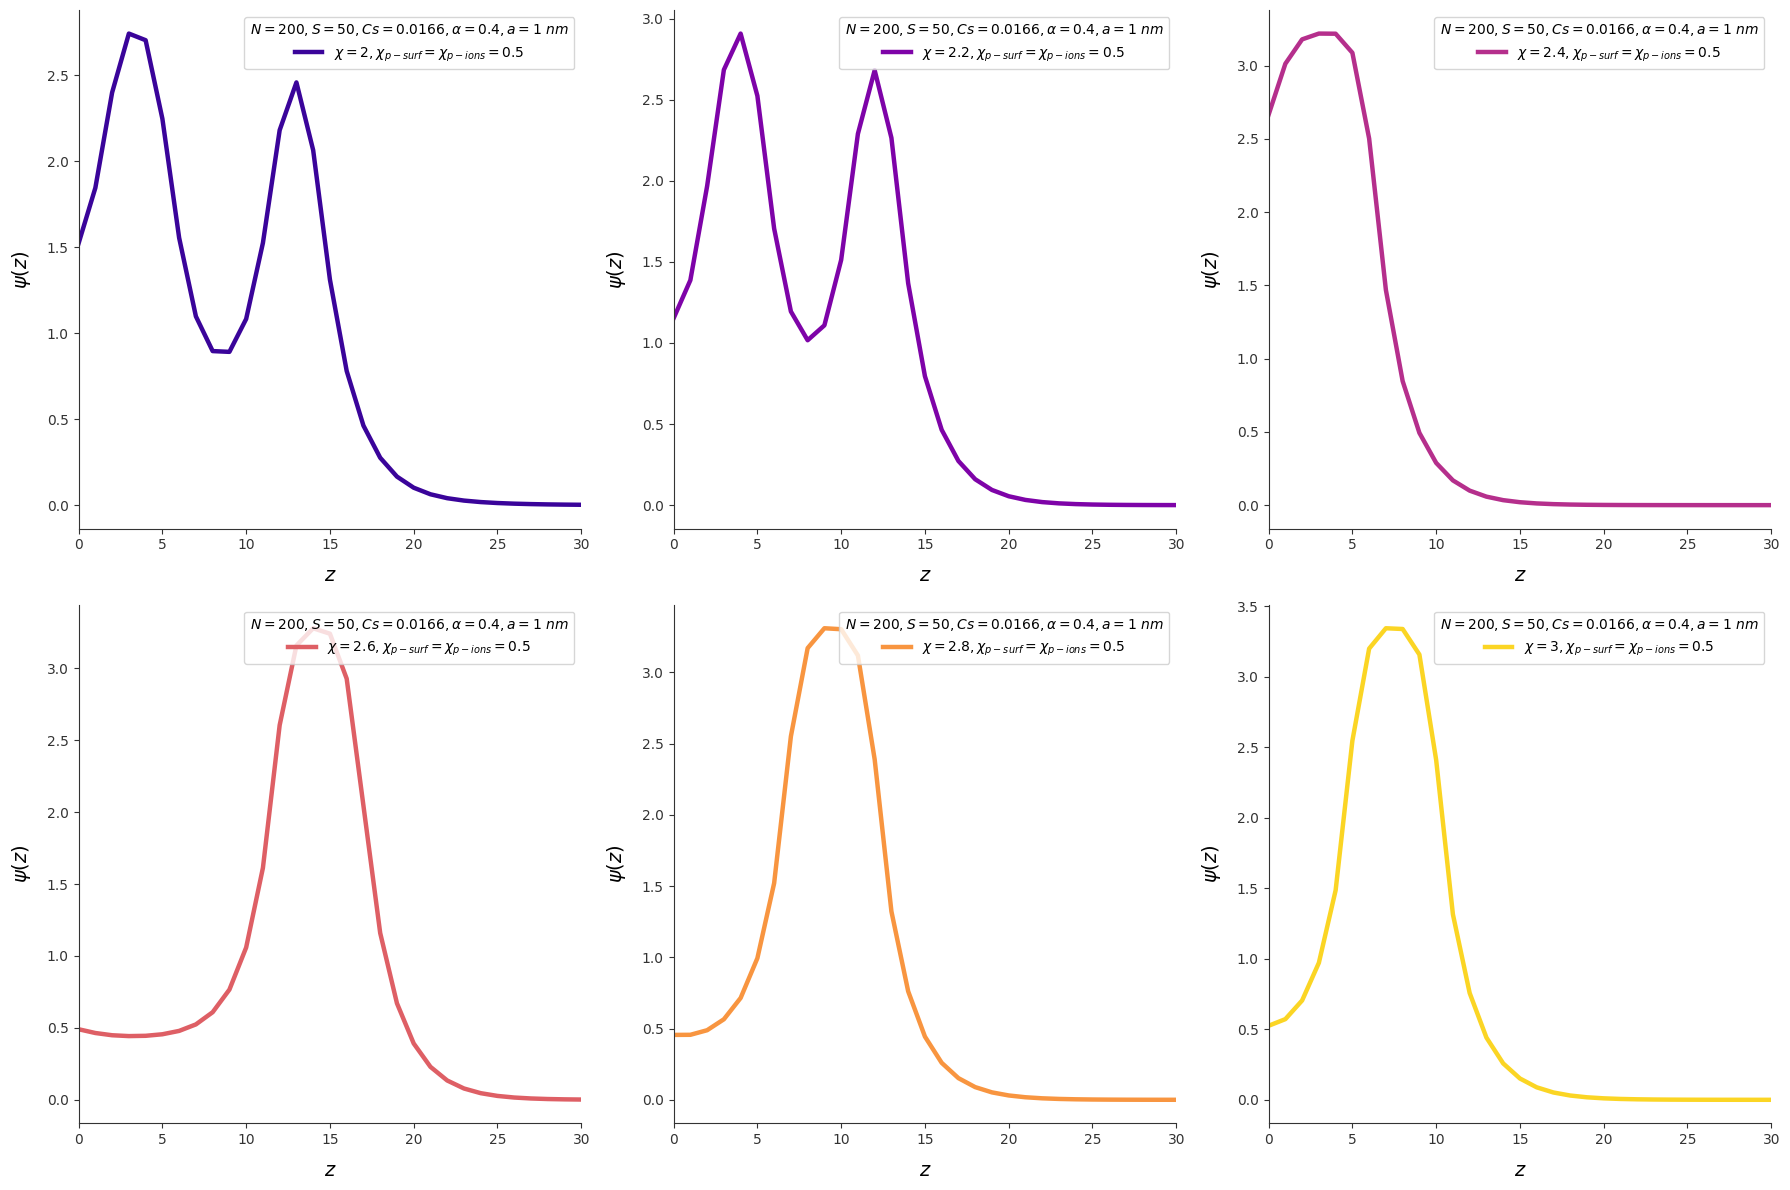

In [44]:
color_map = get_cmap("plasma")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Создаем сетку из 6 графиков (2 строки, 3 столбца)
axes = axes.flatten()  # Преобразуем массив осей в плоский список

for i, (chi, (psi)) in enumerate(psi_brush_prof.items()):

    base_color = color_map((i + 0.5) / len(chi_range))
    ax = axes[i]  # Выбираем текущую ось
    
    ax.plot(psi, label=f'$\\chi = {chi}, \\chi_{{p-surf}} = \\chi_{{p-ions}} = 0.5$', linewidth=3.2, color=base_color, linestyle="-")

    # Настройка визуализации для текущего окна
    ax.set_xlabel("$z$", fontsize=14, labelpad=10)
    ax.set_ylabel("$\\psi(z)$", fontsize=14, labelpad=10)
    ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
              title_fontsize=10, loc="upper right")

    # Добавляем фон и рамку для текущего окна
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
    
    ax.set_xlim(0, 30)

plt.tight_layout()
# plt.savefig('psi_figure_3.pdf', dpi=300, bbox_inches='tight')
plt.show()
